In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline
import re
from sklearn.preprocessing import MinMaxScaler

In [38]:
data = pd.read_csv('playlist0.csv')
data.head()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,song_title,popularity_scores,genre
0,0,0.500,0.964,2,-4.190,1,0.1240,0.007230,0.000062,0.0557,...,audio_features,7ncPjJBktLEOpstY5JOUMK,spotify:track:7ncPjJBktLEOpstY5JOUMK,https://api.spotify.com/v1/tracks/7ncPjJBktLEO...,https://api.spotify.com/v1/audio-analysis/7ncP...,190607,4,一途,70,j-pop
1,1,0.548,0.935,9,-4.579,0,0.1230,0.021500,0.000004,0.0549,...,audio_features,0s1jSiVj6hR0tLWRFJoea4,spotify:track:0s1jSiVj6hR0tLWRFJoea4,https://api.spotify.com/v1/tracks/0s1jSiVj6hR0...,https://api.spotify.com/v1/audio-analysis/0s1j...,215800,4,ええじゃないか,30,city pop
2,2,0.457,0.875,6,-4.611,0,0.1430,0.000573,0.000000,0.1100,...,audio_features,5yZoR6E5TBREAYfLhLRNh8,spotify:track:5yZoR6E5TBREAYfLhLRNh8,https://api.spotify.com/v1/tracks/5yZoR6E5TBRE...,https://api.spotify.com/v1/audio-analysis/5yZo...,174223,4,玄ノ歌,27,city pop
3,3,0.558,0.953,6,-3.092,0,0.0673,0.000363,0.000000,0.1150,...,audio_features,2kbbbiM2xmbdL85SALO4Ed,spotify:track:2kbbbiM2xmbdL85SALO4Ed,https://api.spotify.com/v1/tracks/2kbbbiM2xmbd...,https://api.spotify.com/v1/audio-analysis/2kbb...,263587,4,ハイパーベンチレイション,42,j-pop
4,4,0.504,0.904,6,-6.863,1,0.1790,0.356000,0.121000,0.1400,...,audio_features,1jDJFeK9x3OZboIAHsY9k2,spotify:track:1jDJFeK9x3OZboIAHsY9k2,https://api.spotify.com/v1/tracks/1jDJFeK9x3OZ...,https://api.spotify.com/v1/audio-analysis/1jDJ...,183440,4,I'm Still Standing,84,glam rock


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         73 non-null     int64  
 1   danceability       73 non-null     float64
 2   energy             73 non-null     float64
 3   key                73 non-null     int64  
 4   loudness           73 non-null     float64
 5   mode               73 non-null     int64  
 6   speechiness        73 non-null     float64
 7   acousticness       73 non-null     float64
 8   instrumentalness   73 non-null     float64
 9   liveness           73 non-null     float64
 10  valence            73 non-null     float64
 11  tempo              73 non-null     float64
 12  type               73 non-null     object 
 13  id                 73 non-null     object 
 14  uri                73 non-null     object 
 15  track_href         73 non-null     object 
 16  analysis_url       73 non-nu

In [40]:
data.describe()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity_scores
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,36.000000,0.583726,0.850507,4.657534,-5.208630,0.561644,0.133455,0.084092,0.072801,0.192551,0.606230,137.709425,184493.123288,3.890411,44.808219
std,21.217131,0.146553,0.120878,3.686383,1.995329,0.499619,0.098713,0.147358,0.190643,0.144160,0.245079,32.482587,48831.645721,0.515365,19.820484
min,0.000000,0.258000,0.406000,0.000000,-12.353000,0.000000,0.027900,0.000002,0.000000,0.020700,0.067400,75.428000,60741.000000,1.000000,0.000000
25%,18.000000,0.493000,0.783000,1.000000,-6.192000,0.000000,0.057400,0.001080,0.000000,0.093500,0.432000,109.964000,152256.000000,4.000000,35.000000
50%,36.000000,0.572000,0.896000,5.000000,-4.948000,1.000000,0.093700,0.015900,0.000025,0.140000,0.670000,139.964000,178776.000000,4.000000,45.000000
75%,54.000000,0.703000,0.941000,8.000000,-3.978000,1.000000,0.179000,0.083400,0.015500,0.280000,0.788000,160.174000,210347.000000,4.000000,54.000000
max,72.000000,0.875000,0.995000,11.000000,-0.753000,1.000000,0.508000,0.650000,0.880000,0.663000,0.965000,199.806000,335957.000000,4.000000,88.000000


In [41]:
data['duration_ms'] = data['duration_ms']/1000 # convert to minutes
data.describe()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity_scores
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,36.000000,0.583726,0.850507,4.657534,-5.208630,0.561644,0.133455,0.084092,0.072801,0.192551,0.606230,137.709425,184.493123,3.890411,44.808219
std,21.217131,0.146553,0.120878,3.686383,1.995329,0.499619,0.098713,0.147358,0.190643,0.144160,0.245079,32.482587,48.831646,0.515365,19.820484
min,0.000000,0.258000,0.406000,0.000000,-12.353000,0.000000,0.027900,0.000002,0.000000,0.020700,0.067400,75.428000,60.741000,1.000000,0.000000
25%,18.000000,0.493000,0.783000,1.000000,-6.192000,0.000000,0.057400,0.001080,0.000000,0.093500,0.432000,109.964000,152.256000,4.000000,35.000000
50%,36.000000,0.572000,0.896000,5.000000,-4.948000,1.000000,0.093700,0.015900,0.000025,0.140000,0.670000,139.964000,178.776000,4.000000,45.000000
75%,54.000000,0.703000,0.941000,8.000000,-3.978000,1.000000,0.179000,0.083400,0.015500,0.280000,0.788000,160.174000,210.347000,4.000000,54.000000
max,72.000000,0.875000,0.995000,11.000000,-0.753000,1.000000,0.508000,0.650000,0.880000,0.663000,0.965000,199.806000,335.957000,4.000000,88.000000


In [42]:
data = data.drop(columns=['id', 'Unnamed: 0'])
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,song_title,popularity_scores,genre
0,0.500,0.964,2,-4.190,1,0.1240,0.007230,0.000062,0.0557,0.662,159.971,audio_features,spotify:track:7ncPjJBktLEOpstY5JOUMK,https://api.spotify.com/v1/tracks/7ncPjJBktLEO...,https://api.spotify.com/v1/audio-analysis/7ncP...,190.607,4,一途,70,j-pop
1,0.548,0.935,9,-4.579,0,0.1230,0.021500,0.000004,0.0549,0.713,182.997,audio_features,spotify:track:0s1jSiVj6hR0tLWRFJoea4,https://api.spotify.com/v1/tracks/0s1jSiVj6hR0...,https://api.spotify.com/v1/audio-analysis/0s1j...,215.800,4,ええじゃないか,30,city pop
2,0.457,0.875,6,-4.611,0,0.1430,0.000573,0.000000,0.1100,0.804,161.990,audio_features,spotify:track:5yZoR6E5TBREAYfLhLRNh8,https://api.spotify.com/v1/tracks/5yZoR6E5TBRE...,https://api.spotify.com/v1/audio-analysis/5yZo...,174.223,4,玄ノ歌,27,city pop
3,0.558,0.953,6,-3.092,0,0.0673,0.000363,0.000000,0.1150,0.781,122.024,audio_features,spotify:track:2kbbbiM2xmbdL85SALO4Ed,https://api.spotify.com/v1/tracks/2kbbbiM2xmbd...,https://api.spotify.com/v1/audio-analysis/2kbb...,263.587,4,ハイパーベンチレイション,42,j-pop
4,0.504,0.904,6,-6.863,1,0.1790,0.356000,0.121000,0.1400,0.772,176.808,audio_features,spotify:track:1jDJFeK9x3OZboIAHsY9k2,https://api.spotify.com/v1/tracks/1jDJFeK9x3OZ...,https://api.spotify.com/v1/audio-analysis/1jDJ...,183.440,4,I'm Still Standing,84,glam rock


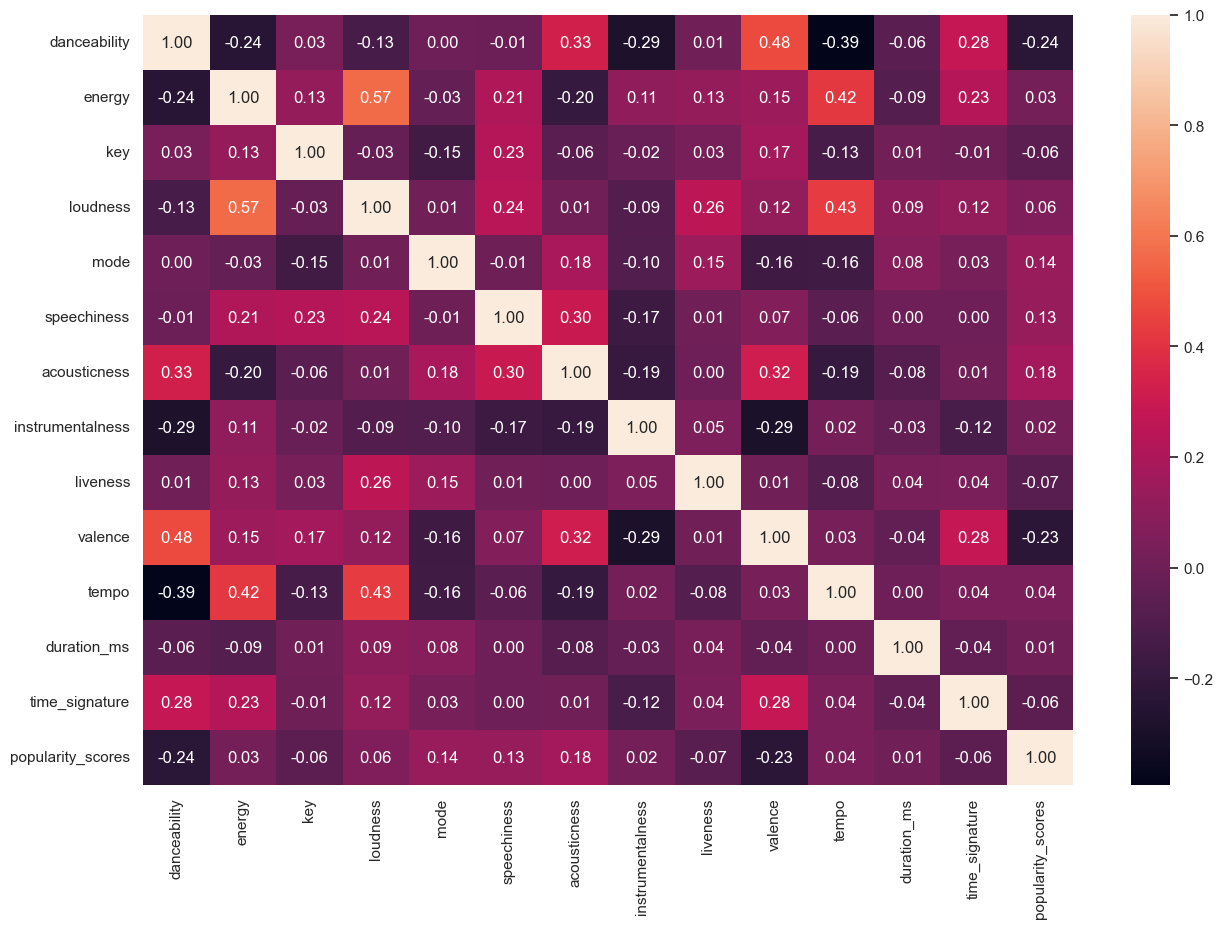

In [43]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data.corr(), annot=True, fmt=".2f",);

In [51]:
#look at popularity feature, plotting top 10 popular songs
data.sort_values(by = 'popularity_scores', ascending=False).head(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,song_title,popularity_scores,genre
72,0.577,0.941,1,-5.170,1,0.1050,0.002070,0.000003,0.0891,0.292,101.921,audio_features,spotify:track:3khEEPRyBeOUabbmOPJzAG,https://api.spotify.com/v1/tracks/3khEEPRyBeOU...,https://api.spotify.com/v1/audio-analysis/3khE...,193.495,4,KICK BACK,88,anime
70,0.728,0.783,11,-4.424,0,0.2660,0.237000,0.000000,0.4340,0.555,77.011,audio_features,spotify:track:1r9xUipOqoNwggBpENDsvJ,https://api.spotify.com/v1/tracks/1r9xUipOqoNw...,https://api.spotify.com/v1/audio-analysis/1r9x...,173.381,4,Enemy (with JID) - from the series Arcane Leag...,85,modern rock
4,0.504,0.904,6,-6.863,1,0.1790,0.356000,0.121000,0.1400,0.772,176.808,audio_features,spotify:track:1jDJFeK9x3OZboIAHsY9k2,https://api.spotify.com/v1/tracks/1jDJFeK9x3OZ...,https://api.spotify.com/v1/audio-analysis/1jDJ...,183.440,4,I'm Still Standing,84,glam rock
31,0.309,0.883,9,-3.825,1,0.0808,0.067300,0.001110,0.0849,0.312,159.488,audio_features,spotify:track:0sTlGEld0h8kIPZaKDYUf4,https://api.spotify.com/v1/tracks/0sTlGEld0h8k...,https://api.spotify.com/v1/audio-analysis/0sTl...,195.121,4,Notion,81,la indie
46,0.529,0.845,8,-8.142,1,0.4040,0.244000,0.000000,0.1430,0.331,85.630,audio_features,spotify:track:5Gt9bxniM1SxN61yRzRhXL,https://api.spotify.com/v1/tracks/5Gt9bxniM1Sx...,https://api.spotify.com/v1/audio-analysis/5Gt9...,255.378,3,United In Grief,75,conscious hip hop
32,0.603,0.783,6,-4.023,1,0.0620,0.449000,0.000008,0.1190,0.775,172.041,audio_features,spotify:track:37y7iDayfwm3WXn5BiAoRk,https://api.spotify.com/v1/tracks/37y7iDayfwm3...,https://api.spotify.com/v1/audio-analysis/37y7...,173.104,4,Dark Red,74,afrofuturism
63,0.513,0.974,1,-1.113,0,0.5080,0.015900,0.000000,0.0712,0.503,195.767,audio_features,spotify:track:2KBYPTSTHjYYOPACrFTkPy,https://api.spotify.com/v1/tracks/2KBYPTSTHjYY...,https://api.spotify.com/v1/audio-analysis/2KBY...,143.552,4,Punk Tactics,70,NaN
0,0.500,0.964,2,-4.190,1,0.1240,0.007230,0.000062,0.0557,0.662,159.971,audio_features,spotify:track:7ncPjJBktLEOpstY5JOUMK,https://api.spotify.com/v1/tracks/7ncPjJBktLEO...,https://api.spotify.com/v1/audio-analysis/7ncP...,190.607,4,一途,70,j-pop
34,0.459,0.974,11,-6.441,1,0.0587,0.000002,0.557000,0.2160,0.546,144.986,audio_features,spotify:track:6y87Q8nkhHP2YqowavLdPA,https://api.spotify.com/v1/tracks/6y87Q8nkhHP2...,https://api.spotify.com/v1/audio-analysis/6y87...,146.333,4,The Only Thing I Know For Real - Maniac Agenda...,67,NaN
69,0.703,0.834,1,-5.134,1,0.0603,0.013900,0.000000,0.1000,0.863,153.970,audio_features,spotify:track:5EIkdrmuu2xkoQWOWjoeFY,https://api.spotify.com/v1/tracks/5EIkdrmuu2xk...,https://api.spotify.com/v1/audio-analysis/5EIk...,178.080,4,Dynasties & Dystopia (from the series Arcane L...,65,dark trap


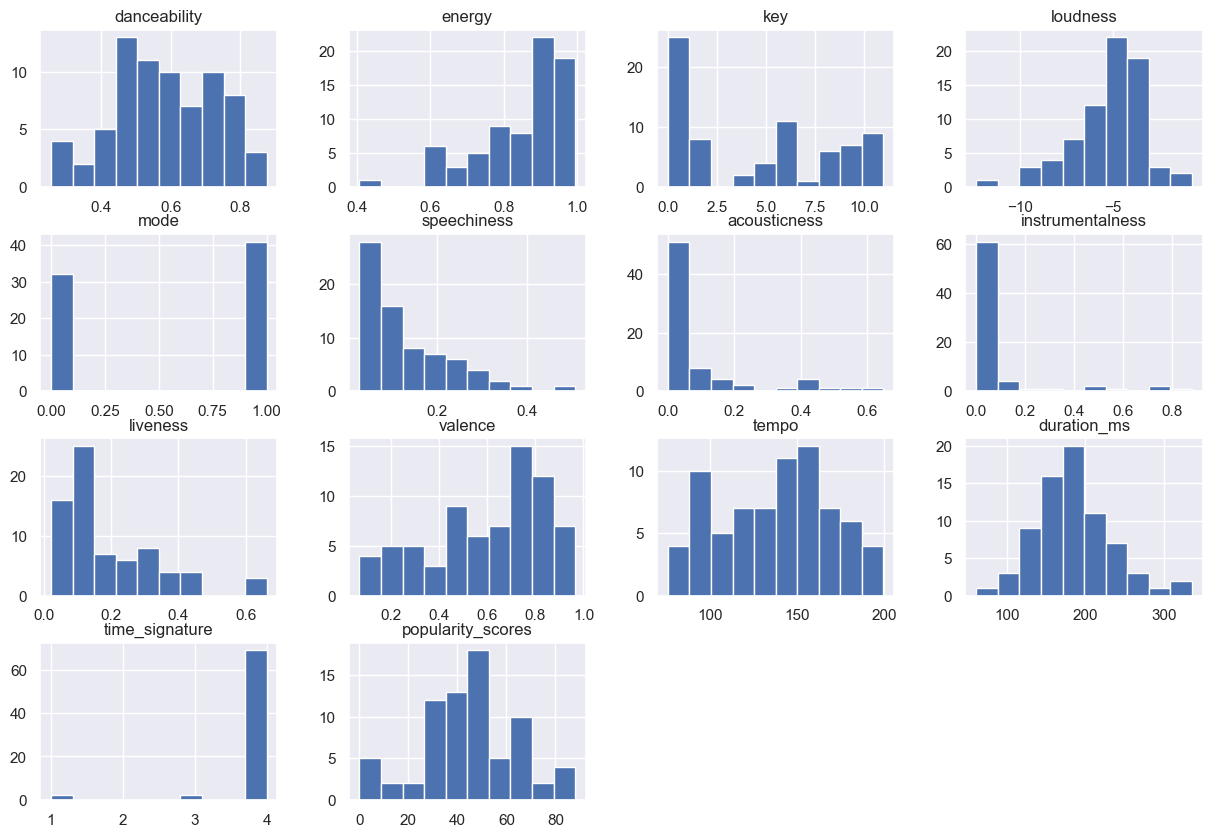

In [52]:
data.hist();

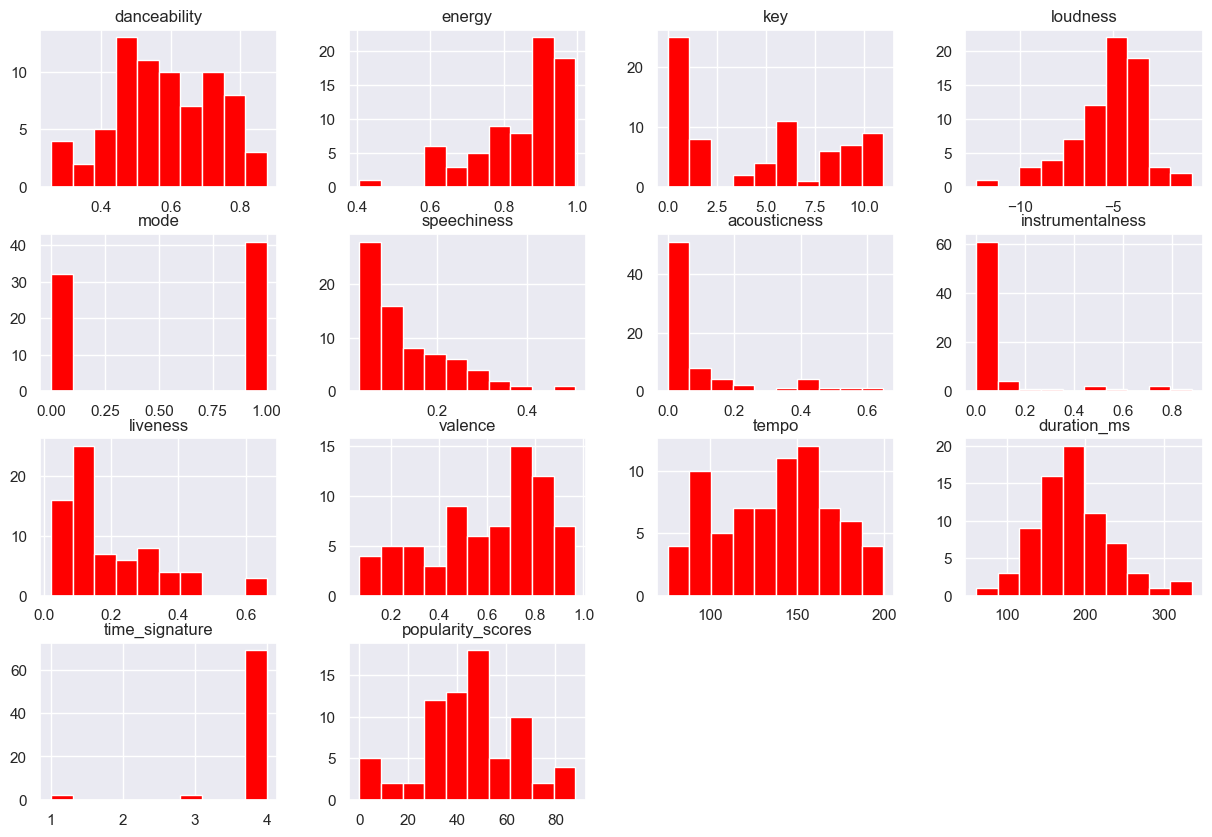

In [54]:
data_top_1000 = data.sort_values(by = 'popularity_scores', ascending=False).head(10000)
data_top_1000.hist(color='red');

<AxesSubplot:xlabel='popularity_scores', ylabel='acousticness'>

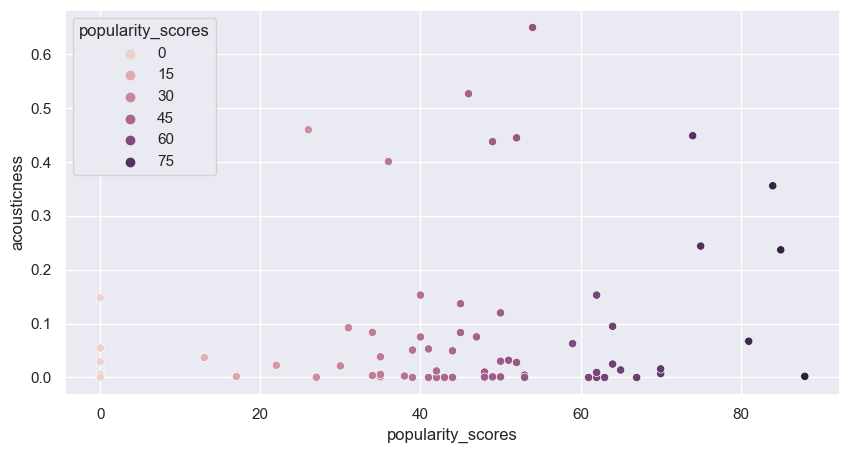

In [57]:
#Plots
sns.set(rc={'figure.figsize':(10,5)})
sns.scatterplot(data = data, x = 'popularity_scores', y = 'acousticness', hue = 'popularity_scores')

<AxesSubplot:xlabel='popularity_scores', ylabel='energy'>

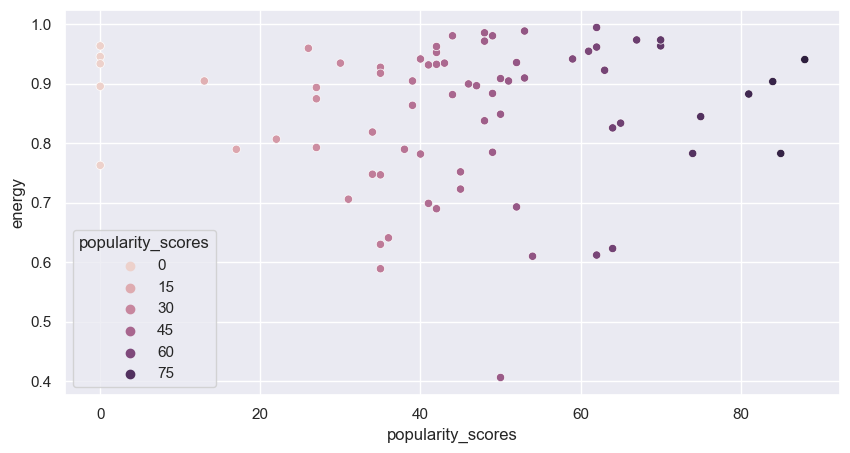

In [58]:
sns.set(rc={'figure.figsize':(10,5)})
sns.scatterplot(data = data, x = 'popularity_scores', y = 'energy', hue = 'popularity_scores')

<AxesSubplot:xlabel='popularity_scores', ylabel='instrumentalness'>

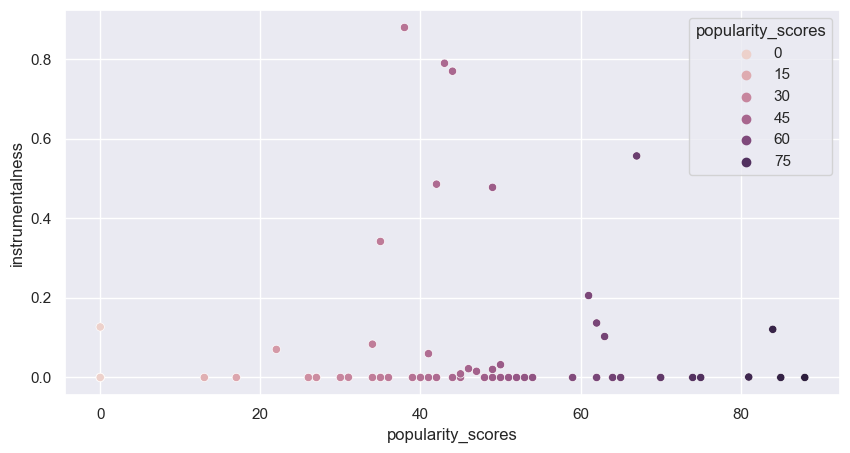

In [60]:
sns.set(rc={'figure.figsize':(10,5)})
sns.scatterplot(data = data, x = 'popularity_scores', y = 'instrumentalness', hue = 'popularity_scores')

<AxesSubplot:xlabel='popularity_scores', ylabel='loudness'>

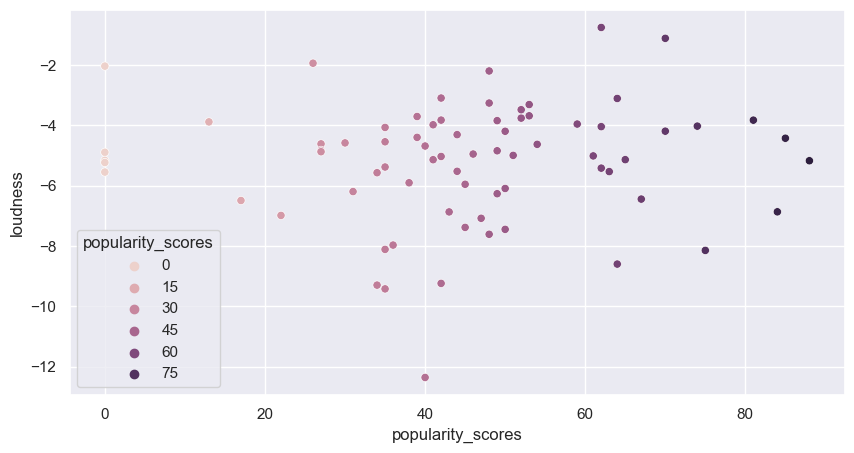

In [61]:
sns.set(rc={'figure.figsize':(10,5)})
sns.scatterplot(data = data, x = 'popularity_scores', y = 'loudness', hue = 'popularity_scores')

<AxesSubplot:xlabel='popularity_scores', ylabel='speechiness'>

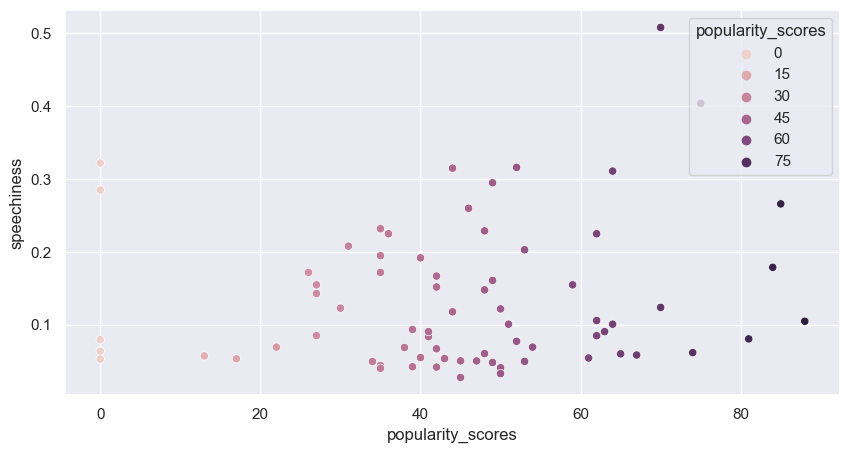

In [62]:
sns.set(rc={'figure.figsize':(10,5)})
sns.scatterplot(data = data, x = 'popularity_scores', y = 'speechiness', hue = 'popularity_scores')


<AxesSubplot:xlabel='popularity_scores', ylabel='valence'>

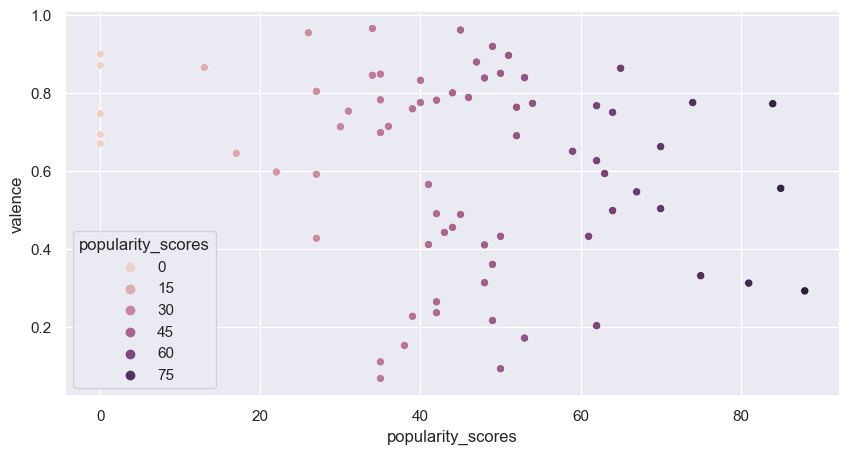

In [63]:
sns.set(rc={'figure.figsize':(10,5)})
sns.scatterplot(data = data, x = 'popularity_scores', y = 'valence', hue = 'popularity_scores')

<AxesSubplot:xlabel='popularity_scores', ylabel='danceability'>

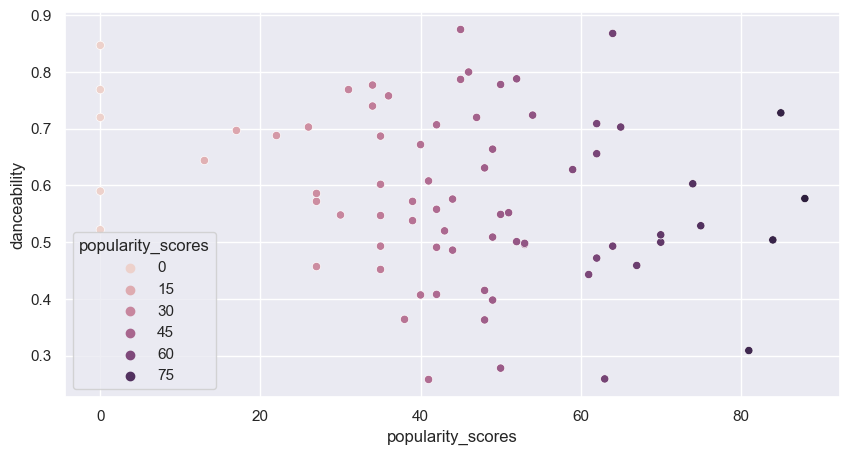

In [64]:
sns.set(rc={'figure.figsize':(10,5)})
sns.scatterplot(data = data, x = 'popularity_scores', y = 'danceability', hue = 'popularity_scores')

Lower acousticness, instrumentalness and lower speechiness  seem better for popularity
Higher energy
Loudness, valence and danceability not relevant

Check valence less or equal than 0.3 to see if more sad or angry songs are more popular

<AxesSubplot:xlabel='popularity_scores', ylabel='valence'>

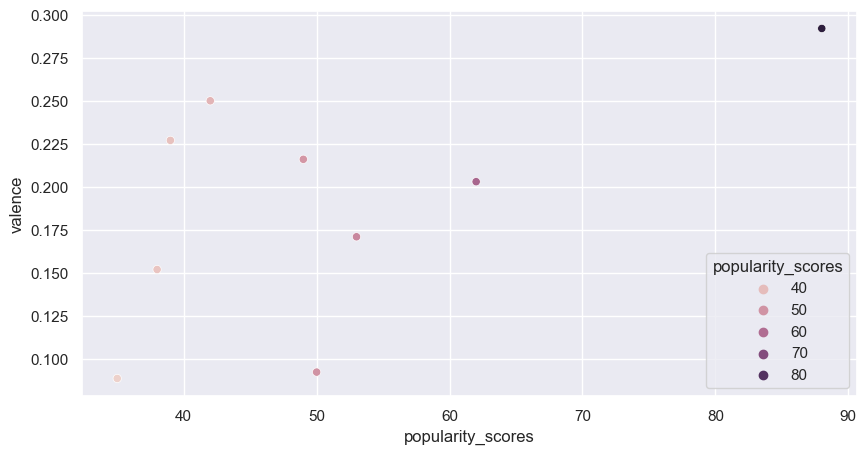

In [68]:
sns.set(rc={'figure.figsize':(10,5)})
data_low_val = data.query('valence<=0.3')
sns.scatterplot(data = data_low_val.groupby(by = 'popularity_scores').mean().reset_index(), x = 'popularity_scores', y = 'valence',
                hue = 'popularity_scores')

Again, not helpful!

## Regression plot - Loudness and Energy correlation

[Text(0.5, 1.0, 'Loudness vs Energy Correlation')]

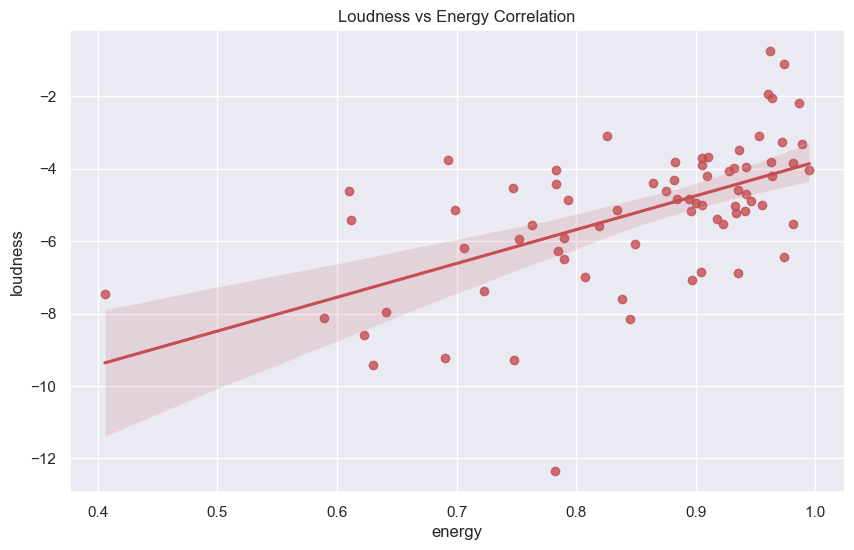

In [73]:
plt.figure(figsize=(10,6))
sns.regplot(data=data, y='loudness', x='energy', color='r').set(title='Loudness vs Energy Correlation')

##  Regression plot - Popularity and Acousticness correlation

[Text(0.5, 1.0, 'Popularity vs Acousticness Correlation')]

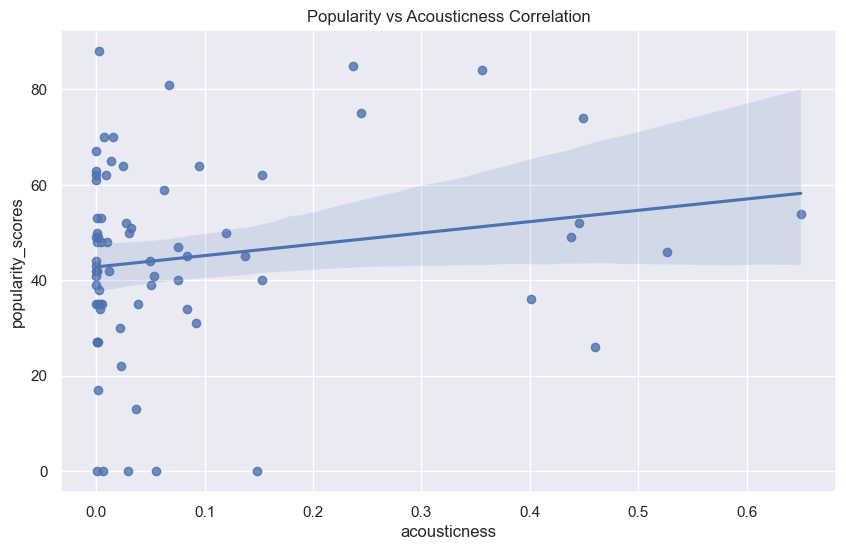

In [77]:
plt.figure(figsize=(10,6))
sns.regplot(data=data, y='popularity_scores', x='acousticness', color='b').set(title='Popularity vs Acousticness Correlation')


## Duration of songs for different genres

Text(0, 0.5, 'Genres')

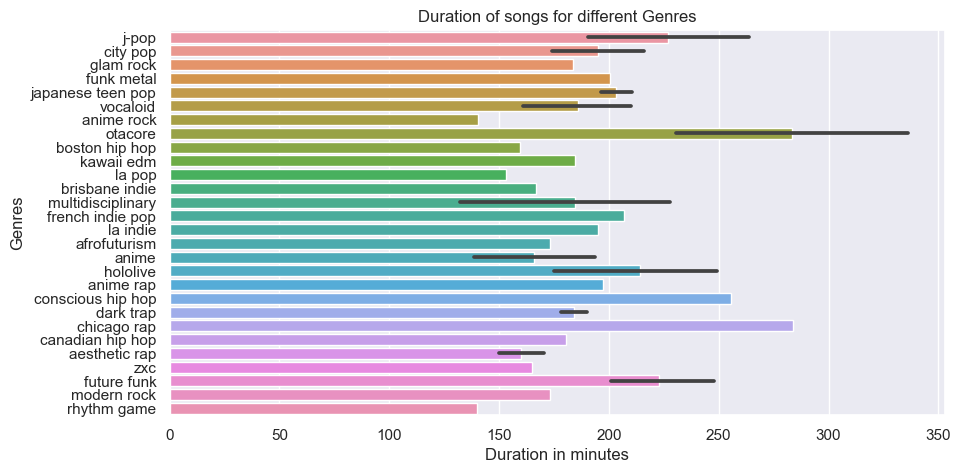

In [86]:
plt.title('Duration of songs for different Genres')
sns.color_palette('magma', as_cmap=True)
sns.barplot(y='genre', x='duration_ms', data=data)
plt.xlabel('Duration in minutes')
plt.ylabel('Genres')

## Top genres by popularity

[Text(0.5, 1.0, 'Top 5 Genres by Popularity')]

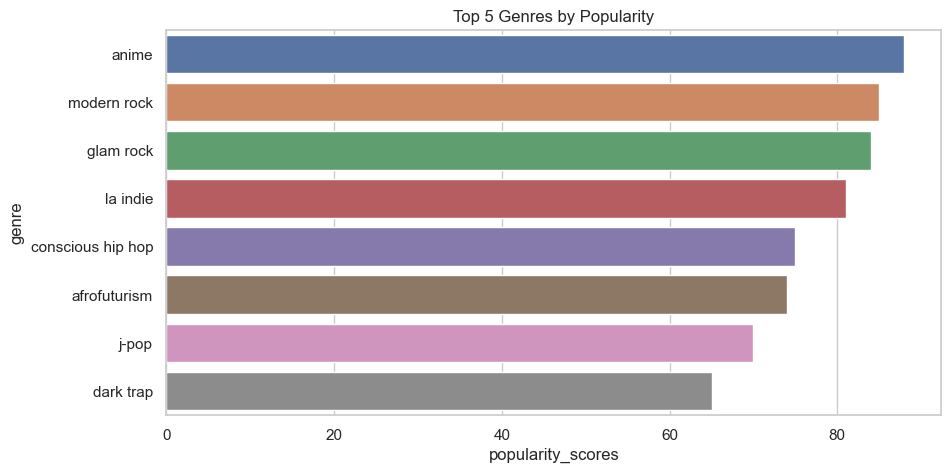

In [88]:
sns.set_style(style='whitegrid')
plt.figure(figsize=(10,5))
popular = data.sort_values('popularity_scores', ascending=False).head(10)
sns.barplot(y = 'genre', x = 'popularity_scores', data = popular).set(title='Top 5 Genres by Popularity')